# Phase 3 Project
- author: Jonathan Holt
- Flatiron Data Science
- 7/19/21 Cohort

In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_squared_log_error, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_rows', 1000) #change the amount of rows displayed
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Fixing column names

In [4]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

# Inital Data Exploration

In [5]:
#df.info()

In [6]:
#df.describe()

In [7]:
#df.isna().sum()

In [8]:
#df.churn.value_counts()

In [9]:
#df['total_intl_minutes'].value_counts()

# Cleaning and Preprocessing

In [10]:
#df.head()

In [11]:
test_df = df.copy()
test_df.head(2)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


## Changing Yes and No to 0 and 1

In [12]:
test_df["churn"] = test_df["churn"].astype(int)

In [13]:
test_df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [14]:
test_df = test_df.drop(columns=['state', 'phone_number', 'international_plan', 'voice_mail_plan'], axis=1)

In [15]:
test_df.head(1)

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


## Slicing out object type Features

In [17]:
cont_features = [col for col in test_df.columns if test_df[col].dtype in [np.float64, np.int64]]

In [18]:
cont_features

['account_length',
 'area_code',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls',
 'churn']

In [19]:
feature_df = test_df.loc[:, cont_features]
#X_test_cat = X_test.loc[:, features_cat]
feature_df

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [20]:
need_to_encode = test_df[['area_code', 'customer_service_calls']]

In [21]:
ohe = OneHotEncoder()
ohe.fit(need_to_encode)

ohe_1 = ohe.transform(need_to_encode).toarray()

ohe_df = pd.DataFrame(ohe_1, columns=ohe.get_feature_names(need_to_encode.columns))
ohe_df.head()

,area_code_408,area_code_415,area_code_510,customer_service_calls_0,customer_service_calls_1,customer_service_calls_2,customer_service_calls_3,customer_service_calls_4,customer_service_calls_5,customer_service_calls_6,customer_service_calls_7,customer_service_calls_8,customer_service_calls_9
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Combining everything together

cleaned_df = pd.concat([pd.DataFrame(feature_df), ohe_df], axis=1)

In [24]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   account_length            3333 non-null   int64  
 1   area_code                 3333 non-null   int64  
 2   number_vmail_messages     3333 non-null   int64  
 3   total_day_minutes         3333 non-null   float64
 4   total_day_calls           3333 non-null   int64  
 5   total_day_charge          3333 non-null   float64
 6   total_eve_minutes         3333 non-null   float64
 7   total_eve_calls           3333 non-null   int64  
 8   total_eve_charge          3333 non-null   float64
 9   total_night_minutes       3333 non-null   float64
 10  total_night_calls         3333 non-null   int64  
 11  total_night_charge        3333 non-null   float64
 12  total_intl_minutes        3333 non-null   float64
 13  total_intl_calls          3333 non-null   int64  
 14  total_in

In [25]:
X = test_df.drop(['churn'], axis=1)
#X = test_df[['area_code', 'international_plan', 'voice_mail_plan', 'customer_service_calls' ]]
y = df['churn']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2499 entries, 978 to 595
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          2499 non-null   int64  
 1   area_code               2499 non-null   int64  
 2   number_vmail_messages   2499 non-null   int64  
 3   total_day_minutes       2499 non-null   float64
 4   total_day_calls         2499 non-null   int64  
 5   total_day_charge        2499 non-null   float64
 6   total_eve_minutes       2499 non-null   float64
 7   total_eve_calls         2499 non-null   int64  
 8   total_eve_charge        2499 non-null   float64
 9   total_night_minutes     2499 non-null   float64
 10  total_night_calls       2499 non-null   int64  
 11  total_night_charge      2499 non-null   float64
 12  total_intl_minutes      2499 non-null   float64
 13  total_intl_calls        2499 non-null   int64  
 14  total_intl_charge       2499 non-null  

# Attempting Cross Val score and grid search

In [41]:
dtree_1 = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dtree_1, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 84.67%


In [42]:
dtree_1

DecisionTreeClassifier()

# Tuning the Decision Tree

## GridSearchCV

In [29]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [52]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dtree_1, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [31]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 92.34%
Mean Test Score: 92.33%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

# GridSearchCV with Random Forests

In [34]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 91.56%


In [35]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [36]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 91.44%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 10}


In [37]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.9232613908872902
Random forest grid search:  0.9100719424460432


# Re-Tuned Decision Tree using params from GridSearch CV

In [39]:
dtree_2 = DecisionTreeClassifier(criterion='gini', 
                           max_depth=5,
                           min_samples_split=2,
                            min_samples_leaf=6,
                            random_state=23)
dtree_2.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7917002959375841

In [46]:
dtree_2.feature_importances_

array([0.        , 0.        , 0.14363881, 0.38614787, 0.        ,
       0.06279867, 0.08800592, 0.        , 0.05590088, 0.        ,
       0.00880475, 0.02609235, 0.01199168, 0.01039016, 0.01419625,
       0.19203267])

In [43]:
dt_cv_score = cross_val_score(dtree_2, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 90.96%


### Analysis:
    - My tuned Decision Tree (dtree_2) improved it's cross validation score from 84% to nearly 91%.

## Feature Importance

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.14364
Feature: 3, Score: 0.38615
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.06280
Feature: 6, Score: 0.08801
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.05590
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00880
Feature: 11, Score: 0.02609
Feature: 12, Score: 0.01199
Feature: 13, Score: 0.01039
Feature: 14, Score: 0.01420
Feature: 15, Score: 0.19203


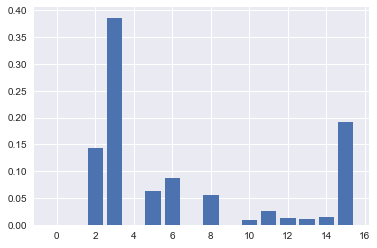

In [45]:
importance = dtree_2.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Plot of Tuned Decision Tree

# Attempting Tree With CLEANED DF intead of test_df

In [47]:
X = cleaned_df.drop(['churn'], axis=1)
#X = test_df[['area_code', 'international_plan', 'voice_mail_plan', 'customer_service_calls' ]]
y = df['churn']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=23)

In [49]:
cleantree_1 = DecisionTreeClassifier()

dt_cv_score = cross_val_score(cleantree_1, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 84.43%


## GridSearchCV

In [51]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [53]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(cleantree_1, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [54]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 92.35%
Mean Test Score: 92.33%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

## CleanTree Model 2

In [55]:
cleantree_2 = DecisionTreeClassifier(criterion='gini', 
                           max_depth=5,
                           min_samples_split=2,
                            min_samples_leaf=6,
                            random_state=23)
cleantree_2.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

ValueError: Number of features of the model must match the input. Model n_features is 16 and input n_features is 29 

# Decision Tree (Attempt #2) 2/16

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X_train)

X_train_ohe = ohe.transform(X_train).toarray()

ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))
ohe_df.head()

In [ ]:
ohe.fit(X_train)

In [ ]:
X_train_ohe = ohe.transform(X_train).toarray()

In [ ]:
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(X_train.columns))
ohe_df.head()

In [ ]:
dtree_baseline=DecisionTreeClassifier(criterion='entropy', random_state=23)
dtree_baseline.fit(X_train_ohe, y_train)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,
                         figsize=(5,5), dpi=300)

tree.plot_tree(dtree_baseline,
              feature_names = ohe_df.columns,
               class_names = np.unique(y).astype('str'),
               filled=True)
plt.show()

In [ ]:
X_test_ohe = ohe.transform(X_test)
y_pred = dtree_baseline.predict(X_test_ohe)

print('Accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
#dtree_baseline_log_loss = -cross_val_score(dtree_baseline, X_train, y_train, scoring="neg_log_loss").mean()
#dtree_baseline_log_loss

# Archive